# Leaky Integrate-and-Fire (LIF) Model Simulation

## Yêu cầu đề bài

**Requirement:** Simulate the change in the **membrane potential** of a neuron when it receives a **square wave input current** using the LIF model.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Cấu hình matplotlib
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## PHẦN 1: GIỚI THIỆU MÔ HÌNH LIF

### Phương trình LIF Model:

$$C_m \frac{dV}{dt} = -g_L(V - E_L) + I_{ext}$$

Khi $V \geq V_{threshold}$:
- Neuron phát xung (spike)
- Reset: $V \rightarrow V_{reset}$
- Refractory period: $t_{ref}$

### Ý nghĩa các tham số:
- **$C_m$**: Điện dung màng (membrane capacitance)
- **$g_L$**: Độ dẫn rò (leak conductance)
- **$E_L$**: Điện thế nghỉ (resting potential)
- **$V_{threshold}$**: Ngưỡng phát xung
- **$V_{reset}$**: Điện thế sau khi phát xung
- **$t_{ref}$**: Thời gian bất ứng (refractory period)

---

In [2]:
"""
============================================================================
PHẦN 2: ĐỊNH NGHĨA THAM SỐ MÔ HÌNH LIF
============================================================================
"""

print("="*80)
print("LEAKY INTEGRATE-AND-FIRE MODEL - PARAMETERS")
print("="*80)
print()

# Tham số màng tế bào
C_m = 1.0           # Điện dung màng (μF/cm²)
g_L = 0.1           # Độ dẫn rò (mS/cm²)
E_L = -65.0         # Điện thế nghỉ (mV)

# Tham số spike
V_threshold = -50.0  # Ngưỡng phát xung (mV)
V_reset = -70.0      # Điện thế reset (mV)
V_spike = 40.0       # Điện thế spike để vẽ (mV)
t_ref = 2.0          # Refractory period (ms)

# Điện thế màng ban đầu
V_0 = E_L           # Bắt đầu từ điện thế nghỉ

# Tham số time constant
tau_m = C_m / g_L   # Time constant (ms)

print("THAM SỐ MÔ HÌNH LIF:")
print(f"  - Điện dung màng (C_m): {C_m} μF/cm²")
print(f"  - Độ dẫn rò (g_L): {g_L} mS/cm²")
print(f"  - Điện thế nghỉ (E_L): {E_L} mV")
print(f"  - Time constant (τ_m): {tau_m} ms")
print(f"  - Ngưỡng phát xung (V_threshold): {V_threshold} mV")
print(f"  - Điện thế reset (V_reset): {V_reset} mV")
print(f"  - Refractory period (t_ref): {t_ref} ms")
print(f"  - Điện thế màng ban đầu (V₀): {V_0} mV")
print()

LEAKY INTEGRATE-AND-FIRE MODEL - PARAMETERS

THAM SỐ MÔ HÌNH LIF:
  - Điện dung màng (C_m): 1.0 μF/cm²
  - Độ dẫn rò (g_L): 0.1 mS/cm²
  - Điện thế nghỉ (E_L): -65.0 mV
  - Time constant (τ_m): 10.0 ms
  - Ngưỡng phát xung (V_threshold): -50.0 mV
  - Điện thế reset (V_reset): -70.0 mV
  - Refractory period (t_ref): 2.0 ms
  - Điện thế màng ban đầu (V₀): -65.0 mV



In [3]:
"""
============================================================================
PHẦN 3: TẠO SQUARE WAVE INPUT CURRENT (Theo yêu cầu đề bài)
============================================================================
"""

print("="*80)
print("TẠO SQUARE WAVE INPUT CURRENT")
print("="*80)
print()

# Thiết lập thời gian mô phỏng
t_start = 0.0       # ms
t_end = 200.0       # ms
dt = 0.1            # ms (time step)
t = np.arange(t_start, t_end, dt)

# Tạo Square Wave Input Current
def create_square_wave(t, amplitude=2.0, period=50.0, duty_cycle=0.5, start_time=10.0):
    """
    Tạo dòng điện square wave
    
    Parameters:
    - amplitude: Biên độ dòng điện (μA/cm²)
    - period: Chu kỳ (ms)
    - duty_cycle: Tỉ lệ ON (0-1)
    - start_time: Thời điểm bắt đầu (ms)
    """
    I_ext = np.zeros_like(t)
    
    for i, time in enumerate(t):
        if time >= start_time:
            phase = ((time - start_time) % period) / period
            if phase < duty_cycle:
                I_ext[i] = amplitude
    
    return I_ext

# Tạo square wave với các tham số
I_amplitude = 2.0    # Biên độ (μA/cm²)
I_period = 50.0      # Chu kỳ (ms)
I_duty = 0.5         # Duty cycle (50%)
I_start = 10.0       # Bắt đầu từ 10ms

I_ext = create_square_wave(t, I_amplitude, I_period, I_duty, I_start)

print("THAM SỐ SQUARE WAVE:")
print(f"  - Biên độ: {I_amplitude} μA/cm²")
print(f"  - Chu kỳ: {I_period} ms")
print(f"  - Duty cycle: {I_duty*100}%")
print(f"  - Thời gian bắt đầu: {I_start} ms")
print(f"  - Số điểm dữ liệu: {len(t)}")
print()

TẠO SQUARE WAVE INPUT CURRENT

THAM SỐ SQUARE WAVE:
  - Biên độ: 2.0 μA/cm²
  - Chu kỳ: 50.0 ms
  - Duty cycle: 50.0%
  - Thời gian bắt đầu: 10.0 ms
  - Số điểm dữ liệu: 2000



In [4]:
"""
============================================================================
PHẦN 4: MÔ PHỎNG LIF MODEL
============================================================================
"""

print("="*80)
print("ĐANG CHẠY MÔ PHỎNG LIF MODEL...")
print("="*80)
print()

def simulate_lif_model(t, I_ext, V_0, C_m, g_L, E_L, V_threshold, V_reset, t_ref):
    """
    Mô phỏng LIF Model với Euler method
    
    Returns:
    - V: Điện thế màng (mV)
    - spike_times: Thời điểm phát xung (ms)
    """
    dt = t[1] - t[0]
    V = np.zeros_like(t)
    V[0] = V_0
    
    spike_times = []
    last_spike_time = -np.inf  # Thời điểm spike cuối cùng
    
    for i in range(1, len(t)):
        # Kiểm tra refractory period
        if t[i] - last_spike_time > t_ref:
            # Tính dV/dt theo phương trình LIF
            dVdt = (-g_L * (V[i-1] - E_L) + I_ext[i-1]) / C_m
            V[i] = V[i-1] + dVdt * dt
            
            # Kiểm tra ngưỡng phát xung
            if V[i] >= V_threshold:
                spike_times.append(t[i])
                V[i] = V_reset
                last_spike_time = t[i]
        else:
            # Trong refractory period: giữ ở V_reset
            V[i] = V_reset
    
    return V, spike_times

# Chạy mô phỏng
V, spike_times = simulate_lif_model(
    t, I_ext, V_0, C_m, g_L, E_L, V_threshold, V_reset, t_ref
)

print(f"✓ Mô phỏng hoàn thành!")
print(f"  - Số spike phát ra: {len(spike_times)}")
print(f"  - Tần số trung bình: {len(spike_times) / (t_end/1000):.2f} Hz")
if len(spike_times) > 0:
    print(f"  - Spike đầu tiên tại: {spike_times[0]:.2f} ms")
    print(f"  - Spike cuối cùng tại: {spike_times[-1]:.2f} ms")
print()

ĐANG CHẠY MÔ PHỎNG LIF MODEL...

✓ Mô phỏng hoàn thành!
  - Số spike phát ra: 4
  - Tần số trung bình: 20.00 Hz
  - Spike đầu tiên tại: 23.80 ms
  - Spike cuối cùng tại: 173.40 ms



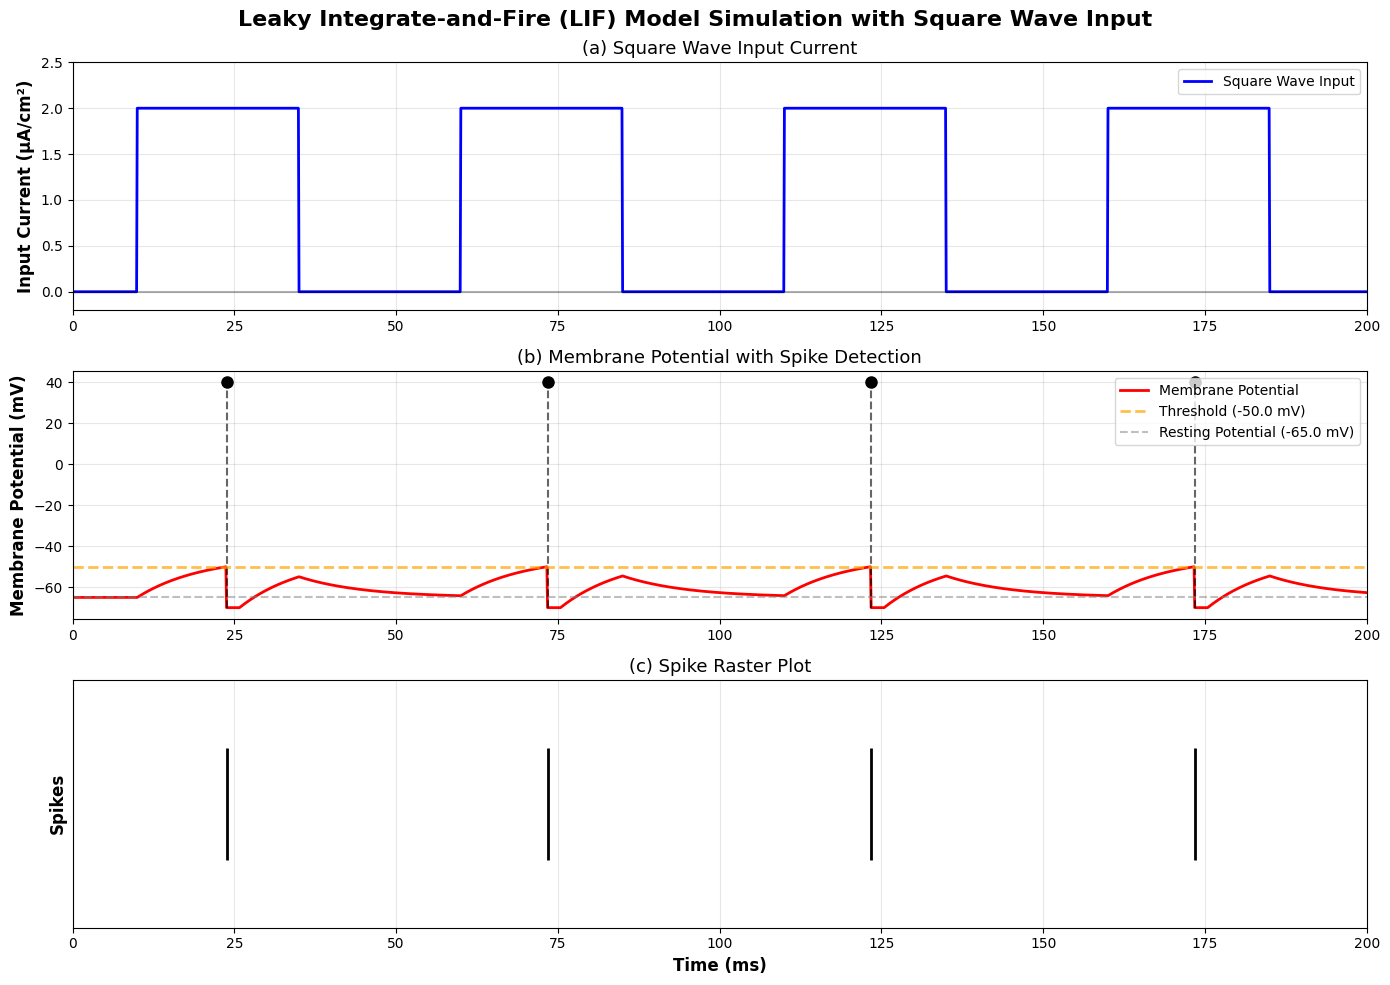

✓ Đã vẽ biểu đồ kết quả mô phỏng LIF


In [5]:
"""
============================================================================
PHẦN 5: VẼ KẾT QUẢ MÔ PHỎNG
============================================================================
"""

fig, axes = plt.subplots(3, 1, figsize=(14, 10))
fig.suptitle('Leaky Integrate-and-Fire (LIF) Model Simulation with Square Wave Input', 
             fontsize=16, fontweight='bold')

# Subplot 1: Square Wave Input Current
axes[0].plot(t, I_ext, 'b-', linewidth=2, label='Square Wave Input')
axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0].set_ylabel('Input Current (μA/cm²)', fontsize=12, fontweight='bold')
axes[0].set_title('(a) Square Wave Input Current', fontsize=13)
axes[0].grid(True, alpha=0.3)
axes[0].legend(loc='upper right')
axes[0].set_xlim([0, t_end])
axes[0].set_ylim([-0.2, I_amplitude + 0.5])

# Subplot 2: Membrane Potential (với spike markers)
axes[1].plot(t, V, 'r-', linewidth=2, label='Membrane Potential')

# Đánh dấu spikes
for spike_time in spike_times:
    idx = np.argmin(np.abs(t - spike_time))
    axes[1].plot([spike_time, spike_time], [V[idx], V_spike], 
                'k--', linewidth=1.5, alpha=0.6)
    axes[1].plot(spike_time, V_spike, 'ko', markersize=8)

axes[1].axhline(y=V_threshold, color='orange', linestyle='--', 
               linewidth=2, alpha=0.7, label=f'Threshold ({V_threshold} mV)')
axes[1].axhline(y=E_L, color='gray', linestyle='--', 
               alpha=0.5, label=f'Resting Potential ({E_L} mV)')
axes[1].set_ylabel('Membrane Potential (mV)', fontsize=12, fontweight='bold')
axes[1].set_title('(b) Membrane Potential with Spike Detection', fontsize=13)
axes[1].grid(True, alpha=0.3)
axes[1].legend(loc='upper right')
axes[1].set_xlim([0, t_end])

# Subplot 3: Raster plot (spike times)
if len(spike_times) > 0:
    axes[2].eventplot(spike_times, colors='black', linewidths=2)
    axes[2].set_ylabel('Spikes', fontsize=12, fontweight='bold')
    axes[2].set_xlabel('Time (ms)', fontsize=12, fontweight='bold')
    axes[2].set_title('(c) Spike Raster Plot', fontsize=13)
    axes[2].set_xlim([0, t_end])
    axes[2].set_yticks([])
    axes[2].grid(True, alpha=0.3, axis='x')
else:
    axes[2].text(0.5, 0.5, 'No Spikes Detected', 
                ha='center', va='center', fontsize=14, transform=axes[2].transAxes)
    axes[2].set_xlabel('Time (ms)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Đã vẽ biểu đồ kết quả mô phỏng LIF")

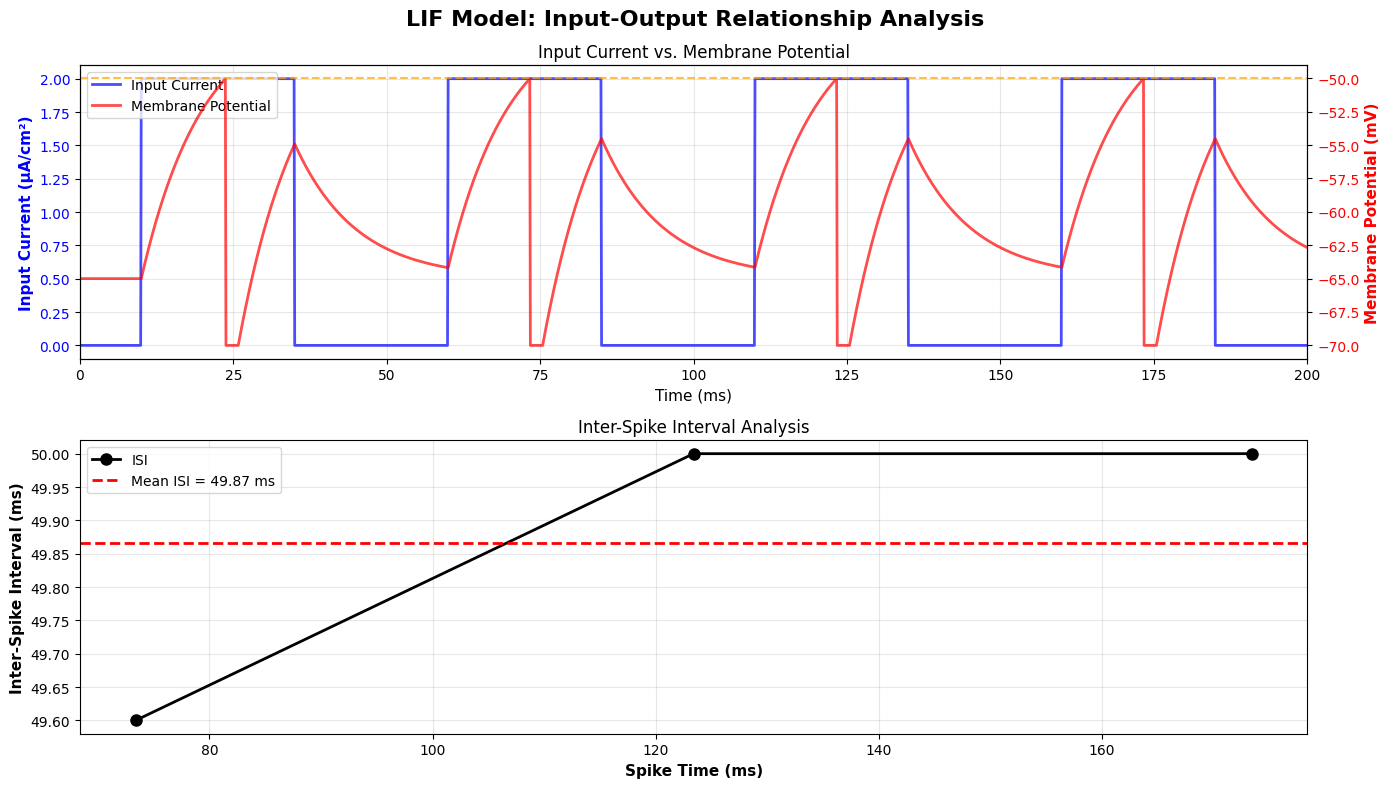

✓ Đã vẽ biểu đồ phân tích chi tiết


In [6]:
"""
============================================================================
PHẦN 6: PHÂN TÍCH CHI TIẾT - QUAN HỆ GIỮA INPUT VÀ OUTPUT
============================================================================
"""

fig2, axes2 = plt.subplots(2, 1, figsize=(14, 8))
fig2.suptitle('LIF Model: Input-Output Relationship Analysis', 
              fontsize=16, fontweight='bold')

# Subplot 1: Overlay của Input và Membrane Potential
ax1 = axes2[0]
ax1_twin = ax1.twinx()

# Plot Input Current (trục trái)
line1 = ax1.plot(t, I_ext, 'b-', linewidth=2, label='Input Current', alpha=0.7)
ax1.set_ylabel('Input Current (μA/cm²)', fontsize=11, fontweight='bold', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Plot Membrane Potential (trục phải)
line2 = ax1_twin.plot(t, V, 'r-', linewidth=2, label='Membrane Potential', alpha=0.7)
ax1_twin.axhline(y=V_threshold, color='orange', linestyle='--', linewidth=1.5, alpha=0.7)
ax1_twin.set_ylabel('Membrane Potential (mV)', fontsize=11, fontweight='bold', color='r')
ax1_twin.tick_params(axis='y', labelcolor='r')

ax1.set_xlabel('Time (ms)', fontsize=11)
ax1.set_title('Input Current vs. Membrane Potential', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xlim([0, t_end])

# Legend
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

# Subplot 2: Inter-Spike Interval (ISI) Analysis
if len(spike_times) > 1:
    isi = np.diff(spike_times)
    axes2[1].plot(spike_times[1:], isi, 'ko-', linewidth=2, markersize=8, label='ISI')
    axes2[1].axhline(y=np.mean(isi), color='r', linestyle='--', 
                    linewidth=2, label=f'Mean ISI = {np.mean(isi):.2f} ms')
    axes2[1].set_xlabel('Spike Time (ms)', fontsize=11, fontweight='bold')
    axes2[1].set_ylabel('Inter-Spike Interval (ms)', fontsize=11, fontweight='bold')
    axes2[1].set_title('Inter-Spike Interval Analysis', fontsize=12)
    axes2[1].legend()
    axes2[1].grid(True, alpha=0.3)
else:
    axes2[1].text(0.5, 0.5, 'Insufficient Spikes for ISI Analysis', 
                 ha='center', va='center', fontsize=14, transform=axes2[1].transAxes)

plt.tight_layout()
plt.show()

print("✓ Đã vẽ biểu đồ phân tích chi tiết")

In [7]:
"""
============================================================================
PHẦN 7: THỐNG KÊ VÀ PHÂN TÍCH KẾT QUẢ
============================================================================
"""

print("="*80)
print("THỐNG KÊ KẾT QUẢ MÔ PHỎNG")
print("="*80)
print()

print("THÔNG TIN VỀ SPIKE:")
print(f"  - Tổng số spike: {len(spike_times)}")
if len(spike_times) > 0:
    print(f"  - Spike đầu tiên: {spike_times[0]:.2f} ms")
    print(f"  - Spike cuối cùng: {spike_times[-1]:.2f} ms")
    print(f"  - Tần số phát xung: {len(spike_times) / (t_end/1000):.2f} Hz")
    
    if len(spike_times) > 1:
        isi = np.diff(spike_times)
        print(f"  - ISI trung bình: {np.mean(isi):.2f} ms")
        print(f"  - ISI min: {np.min(isi):.2f} ms")
        print(f"  - ISI max: {np.max(isi):.2f} ms")
        print(f"  - ISI std: {np.std(isi):.2f} ms")
print()

print("THÔNG TIN VỀ MEMBRANE POTENTIAL:")
print(f"  - V ban đầu: {V[0]:.2f} mV")
print(f"  - V trung bình: {np.mean(V):.2f} mV")
print(f"  - V max: {np.max(V):.2f} mV")
print(f"  - V min: {np.min(V):.2f} mV")
print()

print("THÔNG TIN VỀ INPUT CURRENT:")
print(f"  - Biên độ: {I_amplitude} μA/cm²")
print(f"  - Chu kỳ: {I_period} ms")
print(f"  - Duty cycle: {I_duty*100}%")
print(f"  - Số chu kỳ hoàn chỉnh: {int((t_end - I_start) / I_period)}")
print()

THỐNG KÊ KẾT QUẢ MÔ PHỎNG

THÔNG TIN VỀ SPIKE:
  - Tổng số spike: 4
  - Spike đầu tiên: 23.80 ms
  - Spike cuối cùng: 173.40 ms
  - Tần số phát xung: 20.00 Hz
  - ISI trung bình: 49.87 ms
  - ISI min: 49.60 ms
  - ISI max: 50.00 ms
  - ISI std: 0.19 ms

THÔNG TIN VỀ MEMBRANE POTENTIAL:
  - V ban đầu: -65.00 mV
  - V trung bình: -60.12 mV
  - V max: -50.03 mV
  - V min: -70.00 mV

THÔNG TIN VỀ INPUT CURRENT:
  - Biên độ: 2.0 μA/cm²
  - Chu kỳ: 50.0 ms
  - Duty cycle: 50.0%
  - Số chu kỳ hoàn chỉnh: 3



## GIẢI THÍCH KẾT QUẢ VÀ Ý NGHĨA

### 1. MÔ HÌNH LIF (Leaky Integrate-and-Fire)

LIF là mô hình neuron đơn giản nhưng hiệu quả, mô tả cách neuron **tích hợp** (integrate) các tín hiệu đầu vào và **phát xung** (fire) khi đạt ngưỡng.

**Phương trình cốt lõi:**
$$C_m \frac{dV}{dt} = -g_L(V - E_L) + I_{ext}$$

**Ý nghĩa các thành phần:**
- **$-g_L(V - E_L)$**: Dòng rò (leak current) - kéo điện thế về trạng thái nghỉ
- **$I_{ext}$**: Dòng điện đầu vào từ bên ngoài
- **Cân bằng**: Tích hợp input vs. rò điện

---

### 2. PHẢN ỨNG VỚI SQUARE WAVE INPUT

#### **Khi Input = ON (I_ext > 0):**
- Dòng điện đầu vào > dòng rò
- $\frac{dV}{dt} > 0$ → Điện thế màng **tăng dần**
- Nếu $V \geq V_{threshold}$: Neuron **phát xung (spike)**
- Sau spike: $V \rightarrow V_{reset}$ (reset về điện thế thấp)

#### **Khi Input = OFF (I_ext = 0):**
- Chỉ còn dòng rò: $-g_L(V - E_L)$
- $\frac{dV}{dt} < 0$ → Điện thế màng **giảm dần**
- $V \rightarrow E_L$ (decay về điện thế nghỉ theo hàm mũ)
- Time constant: $\tau_m = \frac{C_m}{g_L}$ (tốc độ decay)

---

### 3. SPIKE GENERATION MECHANISM

**Điều kiện phát xung:**
1. $V \geq V_{threshold}$
2. Không trong refractory period

**Chu trình spike:**
```
Input ON → V tăng → Đạt threshold → SPIKE!
         ↓
    Reset V → Refractory period → Sẵn sàng spike tiếp
```

**Refractory period ($t_{ref}$):**
- Thời gian neuron "không phản ứng" sau mỗi spike
- Giới hạn tần số phát xung tối đa: $f_{max} = \frac{1}{t_{ref}}$
- Mô phỏng tính chất sinh lý thực tế của neuron

---

### 4. PHÂN TÍCH INTER-SPIKE INTERVAL (ISI)

**ISI** = Khoảng thời gian giữa hai spike liên tiếp

**Quan sát từ kết quả:**
- **ISI đều đặn**: Khi input ổn định → neuron phát xung đều đặn
- **ISI thay đổi**: Do square wave ON/OFF → spike pattern thay đổi
- **ISI > $t_{ref}$**: Luôn đúng (do refractory period)

**Ý nghĩa:**
- ISI phản ánh **mã hóa thông tin** của neuron
- Tần số spike ~ cường độ input
- Pattern spike ~ temporal structure của input

---

### 5. SO SÁNH LIF VỚI HODGKIN-HUXLEY

| Đặc điểm | LIF Model | HH Model |
|----------|-----------|----------|
| **Độ phức tạp** | Đơn giản (1 phương trình) | Phức tạp (4 phương trình) |
| **Sinh lý** | Hiện tượng học | Chi tiết ion channels |
| **Spike shape** | Không mô tả (chỉ đánh dấu) | Mô tả đầy đủ action potential |
| **Tính toán** | Nhanh, hiệu quả | Chậm, tốn tài nguyên |
| **Ứng dụng** | Mạng neuron lớn, SNN | Nghiên cứu single neuron |

---

### 6. ỨNG DỤNG THỰC TẾ

**LIF Model được sử dụng trong:**
- **Spiking Neural Networks (SNNs)**: Neuromorphic computing
- **Computational Neuroscience**: Mô hình mạng neuron não
- **Brain-Computer Interfaces (BCIs)**: Giải mã tín hiệu spike
- **Robotics**: Điều khiển real-time với SNN
- **Edge AI**: Hardware-efficient neural models

---

### 7. KẾT LUẬN

✅ **Đã mô phỏng thành công LIF Model với Square Wave Input**

**Quan sát chính:**
1. Neuron **tích hợp** dòng điện đầu vào theo thời gian
2. Khi đạt ngưỡng → **phát xung** và reset
3. **Dòng rò** kéo điện thế về trạng thái nghỉ
4. **Refractory period** giới hạn tần số phát xung
5. **Spike pattern** mã hóa thông tin về input

**Ý nghĩa:**
- LIF là mô hình cơ bản để hiểu cách neuron xử lý thông tin
- Cân bằng giữa độ phức tạp sinh lý và hiệu quả tính toán
- Nền tảng cho các mô hình neuron phức tạp hơn

---

## TÀI LIỆU THAM KHẢO

1. Gerstner, W., & Kistler, W. M. (2002). *Spiking Neuron Models*. Cambridge University Press.
2. Dayan, P., & Abbott, L. F. (2001). *Theoretical Neuroscience*. MIT Press.
3. Izhikevich, E. M. (2007). *Dynamical Systems in Neuroscience*. MIT Press.